!pip install opencv-python
!pip3 install torch torchvision torchaudio
!pip install easyocr
!pip install imutils

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
import cv2

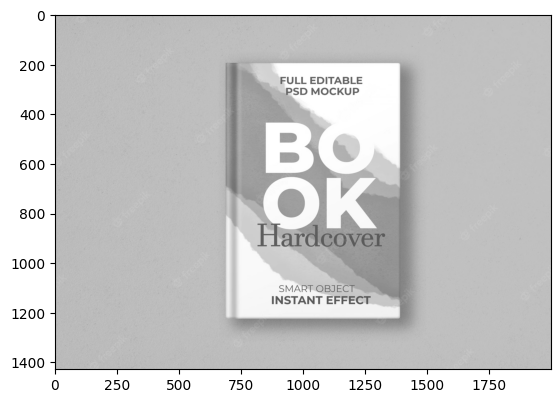

In [255]:
img = cv2.imread('book3.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

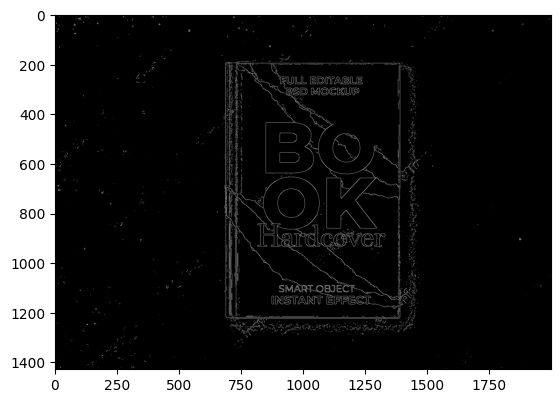

In [287]:
noise_filter = cv2.bilateralFilter(gray, 11,17 ,17) # Noise reduction
edged_img = cv2.Canny(noise_filter,10 ,10) #To edge detection
plt.imshow(cv2.cvtColor(edged_img, cv2.COLOR_BGR2RGB))

In [301]:
keypoints = cv2.findContours(gray.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse=True,)[:10]                             

In [302]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,16, True)
    if len(approx) == 4:
        location = approx
        break

In [303]:
location

array([[[   0,    0]],

       [[   0, 1427]],

       [[1999, 1427]],

       [[1999,    0]]], dtype=int32)

In [304]:
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [location], 0, 255, -1)
new_img = cv2.bitwise_and(img,img, mask=mask)

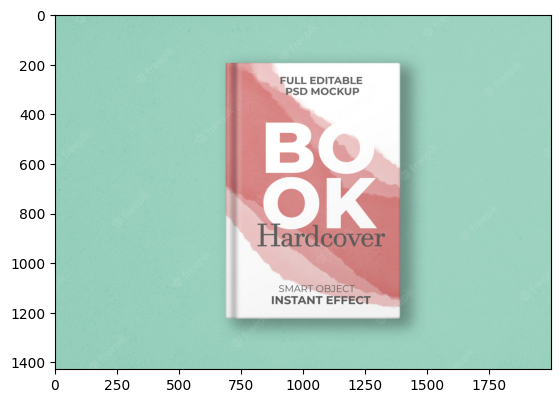

In [305]:
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))